#  **Machine Learning Assignment (AUEB 2023-2024)**  
## **3. Least squares classification**


---

*Author: Yorgos Velissaridis, yorgos.velissaridis@gmail.com*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Let us now consider the problem of classifying 5 second music excerpts into one of the 10 genres of GTzan.

We describe the least squares classification algorithm in the general case and then implement it:

Given a classification problem with $K$ classes, with a 1-of-$K$ binary coding scheme (one-hot) for the target vector $\mathbf{t}$.

Each class $C_k$ is described by its own linear model so that
$$y_k(\mathbf{x}) = \mathbf{w}_k^T\mathbf{x} + w_{kD}$$
where $w_{kD}$ is a bias term and $k = 1,...,K$

Conviniently using vector notation:

$$\mathbf{y}(\mathbf{x}) = \mathbf{\widetilde{W}}^T\mathbf{\widetilde{x}}$$

where $\mathbf{\widetilde{W}}$ is a matrix
whose $k^{th}$ column comprises the $D+1$-dimensional vector $\mathbf{\widetilde{x}}_k = (\mathbf{w}_k^T,w_{kD})^T$
and $\mathbf{\widetilde{x}}$ is the corresponding augmented input vector $(\mathbf{x}^T,1)^T$ with a dummy input $x_D=1$.

A new input $\mathbf{x}$ is assigned to the class for which the output $y_k=\mathbf{\widetilde{w}}_k^T\mathbf{\widetilde{x}}$ is largest.

Consider a training data set $\{\mathbf{x}_n,\mathbf{t}_n\}$ where $n=1,...,N$, and define a matrix $\mathbf{T}$ whose $n^{th}$ row is the one-hot vector $\mathbf{t}_n^T$.

The sum-of-squares error function can then be written as:

$$Error(\mathbf{\widetilde{W}})=\frac{1}{2}Tr\{(\mathbf{\widetilde{W}}\mathbf{\widetilde{X}} - \mathbf{T})^T(\mathbf{\widetilde{W}}\mathbf{\widetilde{X}} - \mathbf{T})\}$$

Setting the derivative with respect to $\mathbf{\widetilde{W}}$ to zero, and rearranging, we obtain the solution:

$$\mathbf{\widetilde{W}}=(\mathbf{\widetilde{X}}^T\mathbf{\widetilde{X}})^{-1}\mathbf{\widetilde{X}}^T\mathbf{T}$$

In [3]:
class LeastSquaresClassifier:

  def __init__(self):
    self.W = None

  def fit(self, X, y):
    # create matrix T containing one-hot encodings of each target
    T = np.zeros((y.size, y.max() + 1))
    T[np.arange(y.size), y] = 1
    # compute weight matrix for the lines of all categories simultaneously
    self.W = np.linalg.solve( X.T.dot(X), X.T.dot(T) )

  def predict(self, X):
    # compute the similarity vectors for each test example
    pred_matrix = self.W.T.dot(X.T)
    # return the index of the maximum vale of each column,
    # corresponding to the predicted category for each test example
    return pred_matrix.argmax(axis=0)

We perform data preprocessing by storing the data into a training example matrix X and a true label vector y (as in 1. PCA).

This time we also add a dummy feature full of 0s as the last column of the training example matrix X that will serve as multipliers of the bias terms of the least squares algorithm.

The matrix X and vector y are synchronously split into train and test pairs, using the `train_test_split` function.

In [4]:
with open('GTzan_60features_5sec.csv', newline='') as csv_file:
    data = pd.read_csv(csv_file)

X = data.iloc[:,2:62].to_numpy()
y = data.iloc[:,62].to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

# add dummy feature equal to 1 at the end of each row
X = np.c_[X, np.ones(X.shape[0])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

label_encoder = LabelEncoder()
label_encoder.fit(y)
y_train_encoded = label_encoder.transform(y_train)

We train our algorithm on the X_train matrix along with the y_train labels and then test its performance by comparing its output y_pred, given the X_test matrix, against the ground truth labels, y_test:

Accuracy on train set: 0.6432027092404451
Accuracy on test set: 0.6119571347997744

Classification Report for our least squares classifier:

              precision    recall  f1-score   support

       blues       0.52      0.68      0.59       164
   classical       0.72      0.92      0.81       175
     country       0.54      0.47      0.50       176
       disco       0.70      0.45      0.55       200
      hiphop       0.60      0.52      0.56       178
        jazz       0.71      0.63      0.67       172
       metal       0.60      0.87      0.71       181
         pop       0.61      0.82      0.70       175
      reggae       0.56      0.61      0.58       178
        rock       0.52      0.18      0.26       174

    accuracy                           0.61      1773
   macro avg       0.61      0.61      0.59      1773
weighted avg       0.61      0.61      0.59      1773



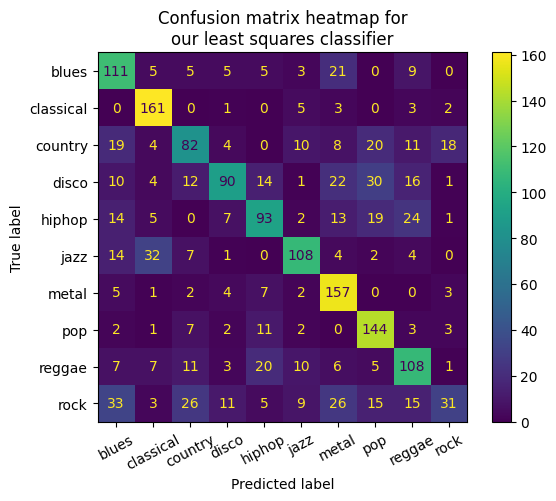

In [5]:
least_squares_classifier = LeastSquaresClassifier()
least_squares_classifier.fit(X_train, y_train_encoded)

y_pred_train = least_squares_classifier.predict(X_train)
y_pred_train_decoded = label_encoder.inverse_transform(y_pred_train)

print("Accuracy on train set:", accuracy_score(y_train, y_pred_train_decoded))

y_pred = least_squares_classifier.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)

print("Accuracy on test set:", accuracy_score(y_test, y_pred_decoded))

class_report = classification_report(y_test, y_pred_decoded)
print("\nClassification Report for our least squares classifier:\n")
print(class_report)

cm = confusion_matrix(y_test, y_pred_decoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax = plt.subplots()
ax.set_title("Confusion matrix heatmap for\nour least squares classifier")
disp.plot(ax=ax)
plt.xticks(rotation=28)
plt.show()

Let's compare our implementation with the ridge classifier of sklearn, the closest algorithm to the least squares classification algorithm that is included in the sklearn library:


Classification Report for sklearn's ridge classifier:

              precision    recall  f1-score   support

       blues       0.52      0.68      0.59       164
   classical       0.72      0.92      0.81       175
     country       0.54      0.47      0.50       176
       disco       0.70      0.45      0.55       200
      hiphop       0.60      0.52      0.56       178
        jazz       0.71      0.63      0.67       172
       metal       0.60      0.87      0.71       181
         pop       0.61      0.82      0.70       175
      reggae       0.56      0.61      0.58       178
        rock       0.52      0.18      0.26       174

    accuracy                           0.61      1773
   macro avg       0.61      0.61      0.59      1773
weighted avg       0.61      0.61      0.59      1773



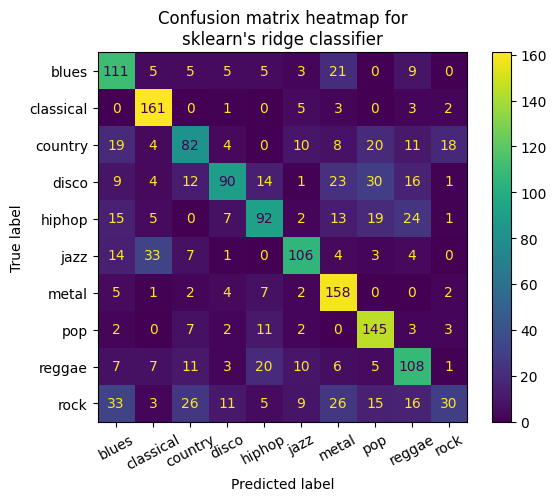

In [6]:
from sklearn.linear_model import RidgeClassifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train_encoded)
ridge_y_pred = ridge_classifier.predict(X_test)

ridge_y_pred_decoded = label_encoder.inverse_transform(ridge_y_pred)

ridge_class_report = classification_report(y_test, ridge_y_pred_decoded)
print("\nClassification Report for sklearn's ridge classifier:\n")
print(class_report)

cm = confusion_matrix(y_test, ridge_y_pred_decoded)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
fig, ax = plt.subplots()
ax.set_title("Confusion matrix heatmap for\nsklearn's ridge classifier")
disp.plot(ax=ax)
plt.xticks(rotation=28)
plt.show()

We see that the performance of the two implementations are almost identical.